# **Classification exercises with TensorFlow**

## **Importing all possible libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

2024-08-03 19:49:07.666357: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-03 19:49:07.857469: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 19:49:07.946321: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 19:49:07.947032: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 19:49:08.091305: I tensorflow/core/platform/cpu_feature_gua

## **Scikit's make_moons()**

In [2]:
X, y = make_moons(n_samples = 2000, random_state = 42)

In [3]:
moons = pd.DataFrame({
    'X1': X[ :, 0],
    'X2': X[ :, 1],
    'label': y
})

In [4]:
moons

,X1,X2,label
0,1.905975,0.076669,1
1,0.444579,0.895740,0
2,0.500000,-0.366025,1
3,-0.956626,0.291319,0
4,0.385330,-0.288785,1
...,...,...,...
1995,0.082408,0.102477,1
1996,0.397808,-0.298352,1
1997,-0.905975,0.423331,0
1998,0.872982,-0.491900,1


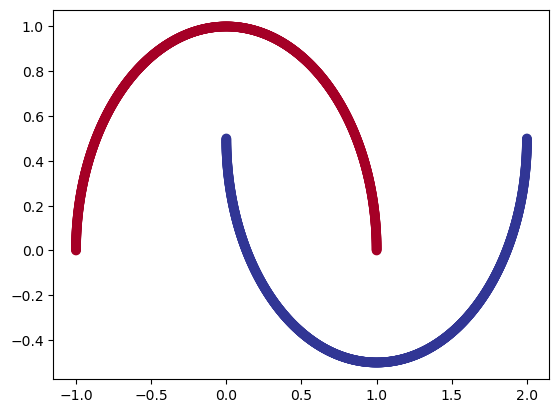

In [5]:
plt.scatter(x = moons.iloc[:, 0], y = moons.iloc[: , 1], c = moons.iloc[: , 2], cmap = 'RdYlBu');

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1500, 2), (500, 2), (1500,), (500,))

### **Create helper functions**

In [8]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x = x_in, verbose = 0)

    # if len(y_pred[0]) > 1:
    if model.output_shape[-1] > 1:
        # print('Multiclassification')
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        # print('Binary classification')
        # y_pred = y_pred.round().reshape(xx.shape)
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [9]:
results = {}

### **Create intial model**

In [10]:
tf.keras.utils.set_random_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 4, activation = 'relu'),    
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model_1.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history_1 = model_1.fit(
    x = X_train,
    y = y_train, 
    epochs = 20,
    validation_split = 0.75
)

2024-08-03 19:49:10.756426: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 19:49:10.911943: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 19:49:10.911983: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 19:49:10.913323: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 19:49:10.913360: I external/local_xla/xla/stream_executor

Epoch 1/20


:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 19:49:11.045332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1722707351.745276     706 service.cc:145] XLA service 0x7f41a8007150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722707351.745320     706 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-08-03 19:49:11.794758: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-03 19:49:11.922208: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 1/12 ━━━━━━━━━━━━━━━━━━━━ 9s 826ms/step - accuracy: 0.4688 - loss: 0.6269

I0000 00:00:1722707352.222849     706 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4657 - loss: 0.6512 - val_accuracy: 0.5031 - val_loss: 0.6170
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4657 - loss: 0.6410 - val_accuracy: 0.4969 - val_loss: 0.6083
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4589 - loss: 0.6311 - val_accuracy: 0.4853 - val_loss: 0.5999
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4508 - loss: 0.6217 - val_accuracy: 0.4729 - val_loss: 0.5917
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4431 - loss: 0.6125 - val_accuracy: 0.4613 - val_loss: 0.5839
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4431 - loss: 0.6036 - val_accuracy: 0.4489 - val_loss: 0.5762
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4278 - loss: 0.5950 - val_accuracy: 0.4400 - val_loss: 0.5688
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4068 - loss: 0.5867 - val_accuracy: 0.4356 - val_loss: 0.5614
Ep

In [11]:
results['model_1'] = model_1.evaluate(x = X_test, y = y_test, verbose = 0)

In [12]:
y_pred_1 = model_1.predict(X_test, verbose = 0)

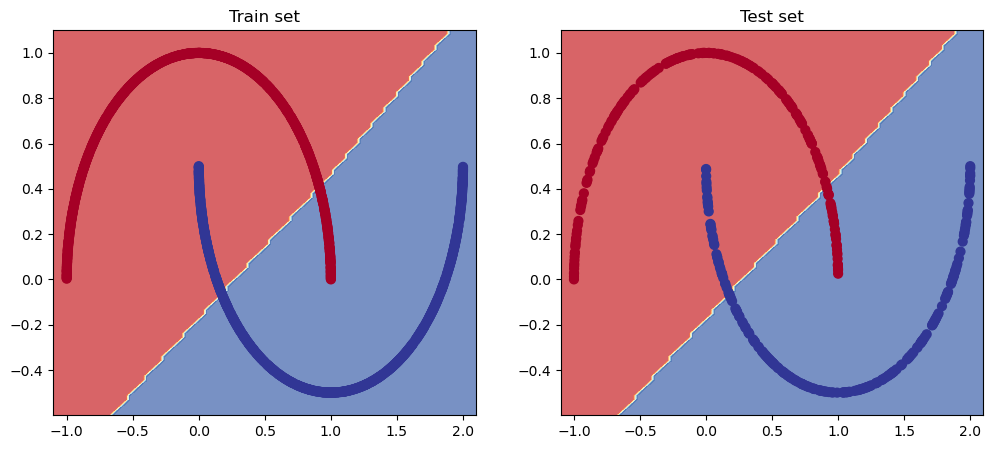

In [13]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_1, X = X_train, y = y_train)
plt.title("Train set")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_1, X = X_test, y = y_test)
plt.title("Test set")
plt.show()

### **Improving the model**

#### **Add more layers**

In [14]:
tf.keras.utils.set_random_seed(42)

model_2  = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history_2 = model_2.fit(
    x = X_train, 
    y = y_train,
    epochs = 20,
    validation_split = 0.75
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8048 - loss: 0.5911 - val_accuracy: 0.8169 - val_loss: 0.5709
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8048 - loss: 0.5813 - val_accuracy: 0.8187 - val_loss: 0.5608
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8048 - loss: 0.5718 - val_accuracy: 0.8187 - val_loss: 0.5511
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8039 - loss: 0.5625 - val_accuracy: 0.8196 - val_loss: 0.5417
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8007 - loss: 0.5534 - val_accuracy: 0.8196 - val_loss: 0.5326
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8007 - loss: 0.5445 - val_accuracy: 0.8187 - val_loss: 0.5237
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8007 - loss: 0.5355 - val_accuracy: 0.8196 - val_loss: 0.5148
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8113 - loss: 0.5266 - val_accuracy: 0.8231 - val_loss

In [15]:
results['model_2'] = model_2.evaluate(x = X_test, y = y_test, verbose = 0)

In [16]:
y_pred_2 = model_2.predict(X_test, verbose = 0)

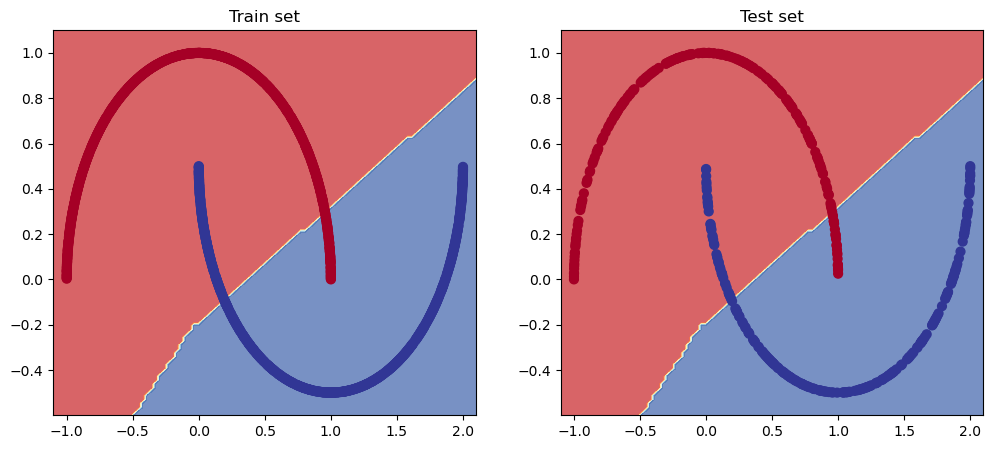

In [17]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_2, X = X_train, y = y_train)
plt.title("Train set")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_2, X = X_test, y = y_test)
plt.title("Test set")
plt.show()

#### **Add more neurons in hidden layers**

In [18]:
tf.keras.utils.set_random_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 8, activation = 'relu'),
    tf.keras.layers.Dense(units = 8, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history_3 = model_3.fit(
    x = X_train,
    y = y_train,
    epochs = 20,
    validation_split = 0.75
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.2551 - loss: 0.7897 - val_accuracy: 0.3031 - val_loss: 0.7658
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3430 - loss: 0.7519 - val_accuracy: 0.4080 - val_loss: 0.7340
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4364 - loss: 0.7260 - val_accuracy: 0.4631 - val_loss: 0.7105
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4869 - loss: 0.7055 - val_accuracy: 0.4880 - val_loss: 0.6901
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4708 - loss: 0.6873 - val_accuracy: 0.5529 - val_loss: 0.6717
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5284 - loss: 0.6706 - val_accuracy: 0.6053 - val_loss: 0.6547
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5898 - loss: 0.6548 - val_accuracy: 0.7102 - val_loss: 0.6381
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7349 - loss: 0.6391 - val_accuracy: 0.8044 - val_loss

In [19]:
results['model_3'] = model_3.evaluate(x = X_test, y = y_test, verbose = 0)

In [20]:
y_pred_3 = model_3.predict(X_test, verbose = 0)

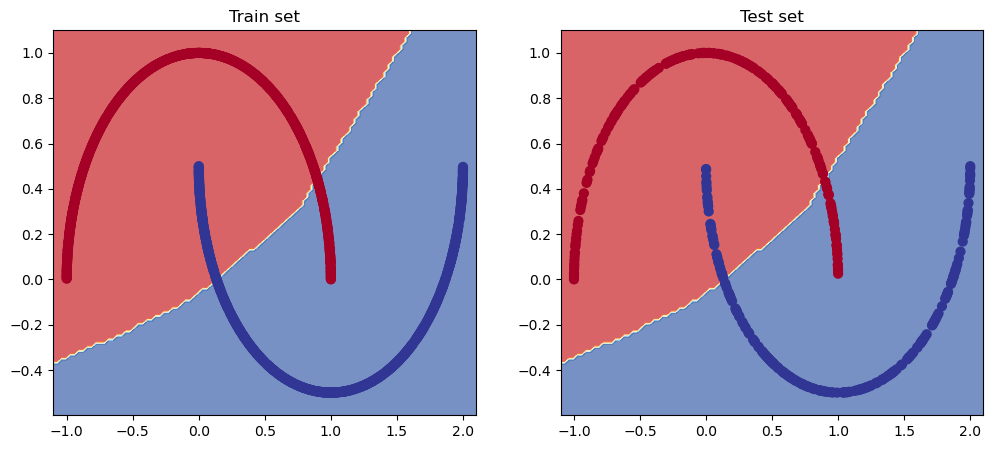

In [21]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_3, X = X_train, y = y_train)
plt.title("Train set")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_3, X = X_test, y = y_test)
plt.title("Test set")
plt.show()

#### **Changing the learning rate value**

In [22]:
tf.keras.utils.set_random_seed(42)

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 8, activation = 'relu'),
    tf.keras.layers.Dense(units = 8, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

history_4 = model_4.fit(
    x = X_train,
    y = y_train,
    epochs = 100,
    validation_split = 0.75,
    callbacks = [lr_scheduler]
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.2537 - loss: 0.7996 - val_accuracy: 0.2284 - val_loss: 0.8068 - learning_rate: 1.0000e-04
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2537 - loss: 0.7951 - val_accuracy: 0.2284 - val_loss: 0.8012 - learning_rate: 1.1220e-04
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2537 - loss: 0.7899 - val_accuracy: 0.2276 - val_loss: 0.7951 - learning_rate: 1.2589e-04
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2537 - loss: 0.7843 - val_accuracy: 0.2276 - val_loss: 0.7885 - learning_rate: 1.4125e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2537 - loss: 0.7783 - val_accuracy: 0.2276 - val_loss: 0.7814 - learning_rate: 1.5849e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2537 - loss: 0.7720 - val_accuracy: 0.2267 - val_loss: 0.7741 - learning_rate: 1.7783e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2590

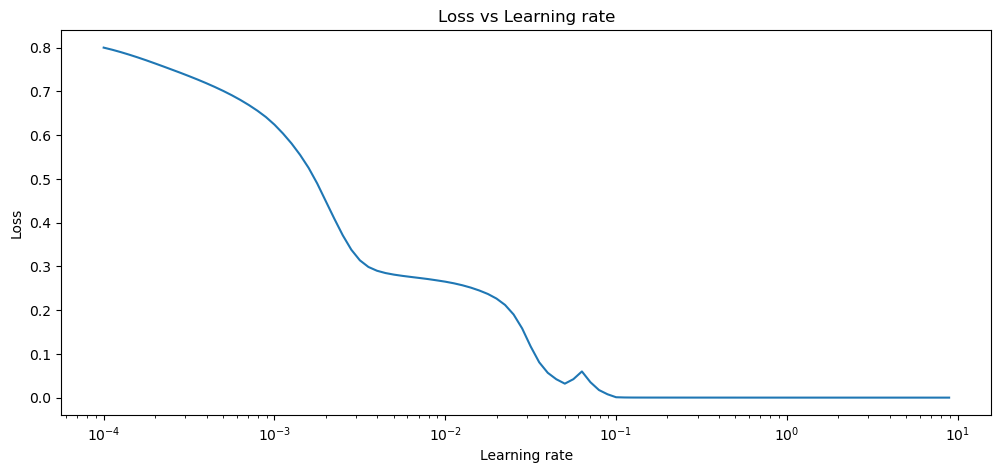

In [23]:
plt.figure(figsize = (12, 5))
plt.semilogx(history_4.history['learning_rate'], history_4.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel('Loss')
plt.title('Loss vs Learning rate')
plt.show()

In [24]:
tf.keras.utils.set_random_seed(42)

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 8, activation = 'relu'),
    tf.keras.layers.Dense(units = 8, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

history_5 = model_5.fit(
    x = X_train,
    y = y_train,
    epochs = 40,
    validation_split = 0.75
)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3773 - loss: 0.7308 - val_accuracy: 0.7938 - val_loss: 0.5953
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7620 - loss: 0.5799 - val_accuracy: 0.8027 - val_loss: 0.4872
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7842 - loss: 0.4797 - val_accuracy: 0.8436 - val_loss: 0.3875
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8466 - loss: 0.3757 - val_accuracy: 0.8622 - val_loss: 0.3224
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8553 - loss: 0.3168 - val_accuracy: 0.8702 - val_loss: 0.2959
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8593 - loss: 0.3008 - val_accuracy: 0.8756 - val_loss: 0.2858
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8645 - loss: 0.2950 - val_accuracy: 0.8773 - val_loss: 0.2763
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8676 - loss: 0.2878 - val_accuracy: 0.8773 - val_loss

In [25]:
results['model_5'] = model_5.evaluate(x = X_test, y = y_test, verbose = 0)

In [26]:
y_pred_5 = model_5.predict(X_test, verbose = 0)

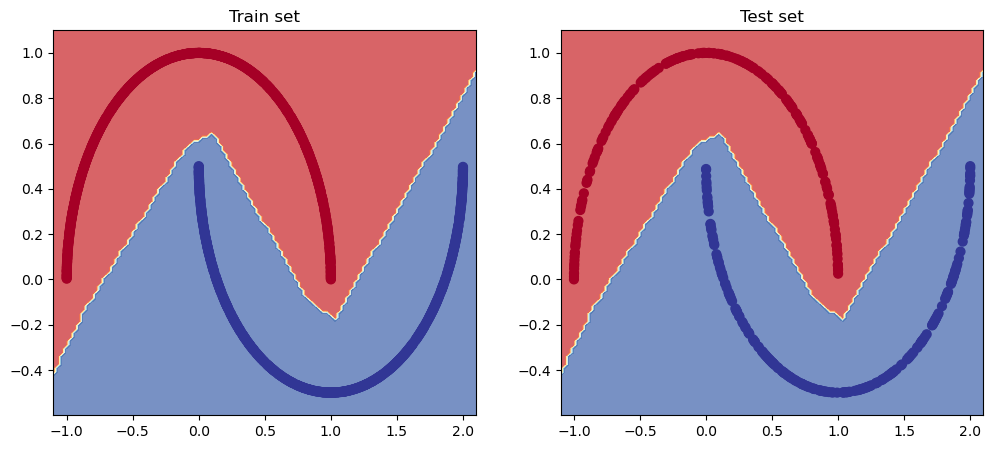

In [27]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_5, X = X_train, y = y_train)
plt.title("Train set")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_5, X = X_test, y = y_test)
plt.title("Test set")
plt.show()

### **Model comparison**

In [29]:
results_df = pd.DataFrame(results.values(), index = results.keys(), columns = ['Loss', 'Accuracy'])

In [30]:
results_df

,Loss,Accuracy
model_1,0.462875,0.850
model_2,0.380704,0.860
model_3,0.421928,0.854
model_5,0.003854,1.000
